<a href="https://colab.research.google.com/github/adowaconan/LevelUpPythonTutorial/blob/master/3_Solve_a_problem_with_numpy_and_pandas_How_many_trials_I_need_to_repeat_the_experiment_if_I_want_to_subject_to_have_10_unique_responses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Say I have an experiment design, and subjects can uniformly respond to the stimuli, meaning that they can press 10 different keys at their will. If the responses are truely random, how many trials do I need to perform so that I can get all 10 unique responses?


# This can transfer to a die rolling problem: rolling a 10 faces die, how many times do I have to roll to get all 10 faces?

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for visualization, will introduce in detail later
import seaborn as sns # for better visualization, will introduce in detail later
sns.set_style('whitegrid') # make the background white with grids
sns.set_context('poster') # make the figure look better as if it is on a poster

# First, we make a function to simulate a fair die

In [0]:
def dice(n_times_rolling): 
    return np.random.choice(np.arange(1,11,1),size=n_times_rolling)

## Let's test if it is fair

In [0]:
faces_get = dice(n_times_rolling = 5000)

(array([518., 526., 474., 470., 525., 462., 514., 478., 507., 526.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

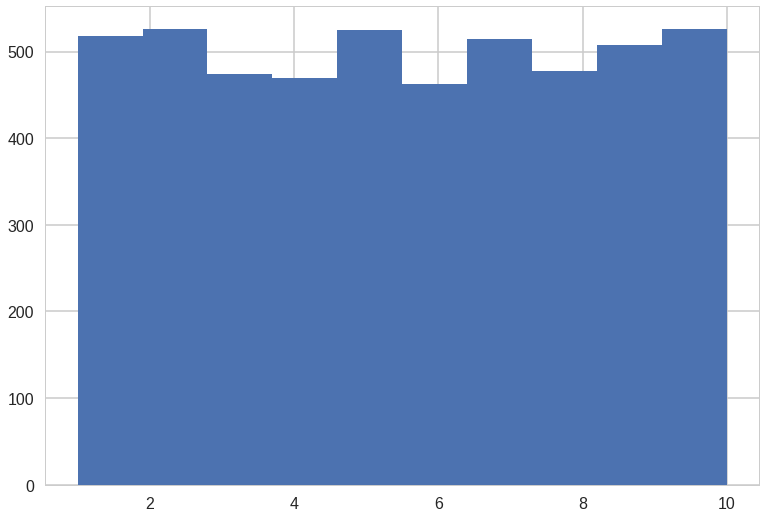

In [0]:
plt.hist(faces_get)

# To simplify the problem a little bit: what if we are super lucky and the 3rd roll gives me a different face than both 1st and 2nd rolls? Keep in mind that this DOES NOT imply that the 1st and the 2nd roll are the same or different

## It might be a good time to clarify `simulation` and `experiment`

1. experiment: in the current context, execute the rolling function (regardless of how many times we roll) once to perform one trial of the experiment, so 1000 times of execution would be one experiment
2. simulation: we want to repeat the experiment multiple times so that we simulate the same experiment 500 times.

In [0]:
results = [] # create an empty list to store results
for jj in range(500): # times of simulation - to estimate the variance of the simulation
    result = [] # create an empty list to store 1000 repeats of rolling 3 times
    for ii in range(1000): # times of rolling the 10-face die 3 times - an estimate because of large number theorem
        temp = dice(3) # roll the die 3 times
        condition1 = temp[-1] != temp[0] # the last one is different from the first one
        condition2 = temp[-1] != temp[1] # the last one is different from the second one
        # we count it a success if and only if both conditions are True, 
        # thus, we use the 'logical_and' to explicitly perform that kind of logical computation
        success_or_fail = np.logical_and((condition1),(condition2))
        result.append(success_or_fail)
    # convert the list to an numpy array
    result = np.array(result)
    # True is 1 and False is 0 in Python so that we can just sum these number up to get the number of True
    probability_of_success = np.sum(result)/1000
    results.append(probability_of_success)


# Visualization

## 1. one way to create an empty figure for us to plot is: fig = plt.figure(figsize=(16,8))
## 2. another way to create an empty figure for us to plot is: fig, ax = plt.subplots(figsize=(16,8))

### They both define a 16 inches by 8 inches figure, but the second one give us the `axis` property to work with. We cannot work directly with `figure` property unless we want to modify the whole figure. Think of the `figure` as the background, and `axis` as a front layer of the background. Creating an `axis` property is very useful when we want to plot 2 plots on the same figure, and we can predefine their locations by: fig, (ax1,ax2) = plt.subplots(figsize=(16,8),nrows = 2), and we can create an empty plot on top of the other

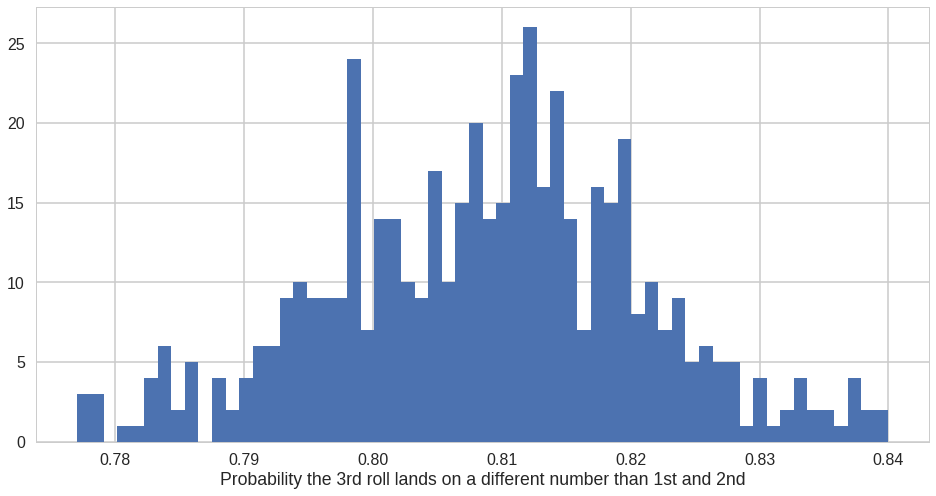

In [0]:
fig,ax = plt.subplots(figsize=(16,8)) # my way of defining the plotting properties
# now all the plotting can be done on the axis property
_=ax.hist(results,bins=60)
_=ax.set(xlabel='Probability the 3rd roll lands on a different number than 1st and 2nd')

# Let's move on to a more complex question: with more rolls of the dice, what is the chance that we land on a face that is different from all those before?

In [0]:
times_of_rolling = np.arange(3,16,1)
# a different way to create empty spaces to store the process: preallocation
results = np.zeros((len(times_of_rolling),100))
for idx,roll_this_time in enumerate(times_of_rolling):
    
    for sim in range(100): # number of simulations - to estimate the variance of the simulations
        result = []
        for ii in range(500): # number of rolls for the 10-face die 3-16 times - an estimate because of large number theorem
            temp = dice(roll_this_time)
            
            # list comprehension, aka one-liner for-loop
            # compare the last landing to all previous landings with a for-loop
            compare_to_all_previous = [temp[-1] != temp[k] for k in range(roll_this_time-1)]
            convert_to_true_or_false = tuple(compare_to_all_previous)
            are_they_all_true = all(convert_to_true_or_false)
            
            result.append(are_they_all_true)
        result = np.array(result)
        
        # use the `idx` and `sim` as the indexing value to store the probability calculation
        results[idx,sim] = np.sum(result)/500

In [0]:
results

array([[0.78 , 0.822, 0.802, ..., 0.804, 0.798, 0.802],
       [0.718, 0.706, 0.714, ..., 0.738, 0.74 , 0.7  ],
       [0.62 , 0.678, 0.668, ..., 0.682, 0.66 , 0.668],
       ...,
       [0.314, 0.316, 0.268, ..., 0.264, 0.222, 0.246],
       [0.23 , 0.232, 0.268, ..., 0.25 , 0.276, 0.27 ],
       [0.242, 0.22 , 0.244, ..., 0.204, 0.262, 0.262]])

In [0]:
results.shape

(13, 100)

## `results` have 2 dimensions:

1. different number of rolls
2. number of simulations

Thus, we should take the mean and standard deviation over the second dimension

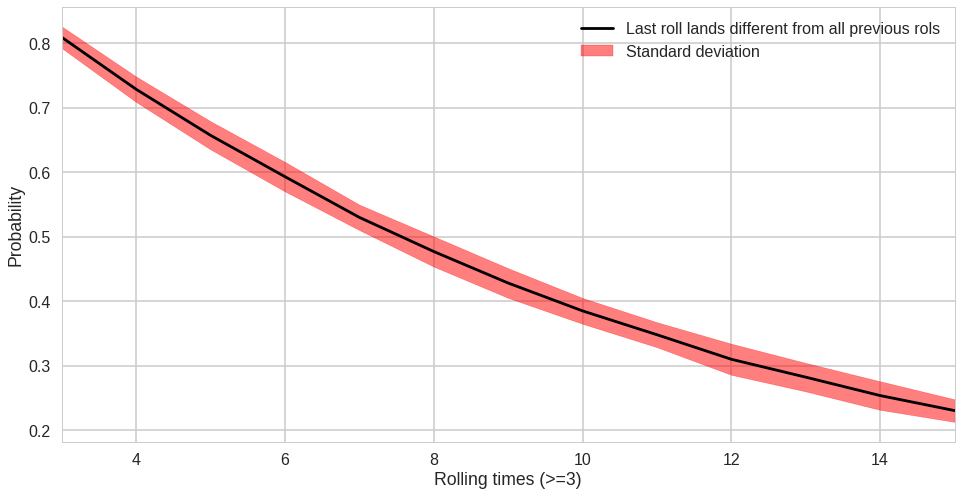

In [0]:
fig,ax = plt.subplots(figsize=(16,8))
# 
results_mean = results.mean(1)
# standard error = standard deviation / square root of the sample size
results_se = results.std(1) / np.sqrt(results.shape[1])
# standard deviation
results_std = results.std(1)

ax.plot(times_of_rolling,results_mean,
        color = 'black',
        linestyle = '-',
        alpha = 1., # from 0 to 1, 1 means not transparent at all
        label = 'Last roll lands different from all previous rols', # this can be shown on the figure as legends
       )
# fancy way of plotting the variance of a line
ax.fill_between(times_of_rolling,
                results_mean + results_std, # upper limit
                results_mean - results_std, # lower limit
                color = 'red',
                alpha = 0.5, # make it transparent
                label = 'Standard deviation')
# .set() is a function method can be called from the `axis` property, and the 
# calling will return some values (outputs of a function), but we don't care, 
# so we assign these outputs to `_`, which means I don't care in Python
_=ax.set(xlabel = 'Rolling times (>=3)', # change the name of the x axis
         ylabel = 'Probability', # change the name of the y axis
         xlim = (times_of_rolling.min(),times_of_rolling.max()), # constrain the limit of the x axis that I want to show
        )
# show the legends at the best location chosen by the program
_=ax.legend(loc='best')

# Now we can directly simulate how many times I have to roll the die to get all faces for at least once. In other words, given that I have rolled N times, what is the expected unique faces I will get? 

In [0]:
# preallocation
result=np.zeros((100,500))
for ii in range(100): # 100 times of different simulation
    for jj in range(500): # 500 times of repeating the rolling 
        temp=dice(ii)
        count_possible_outcomes = np.unique(temp)
        result[ii,jj]=len(count_possible_outcomes)

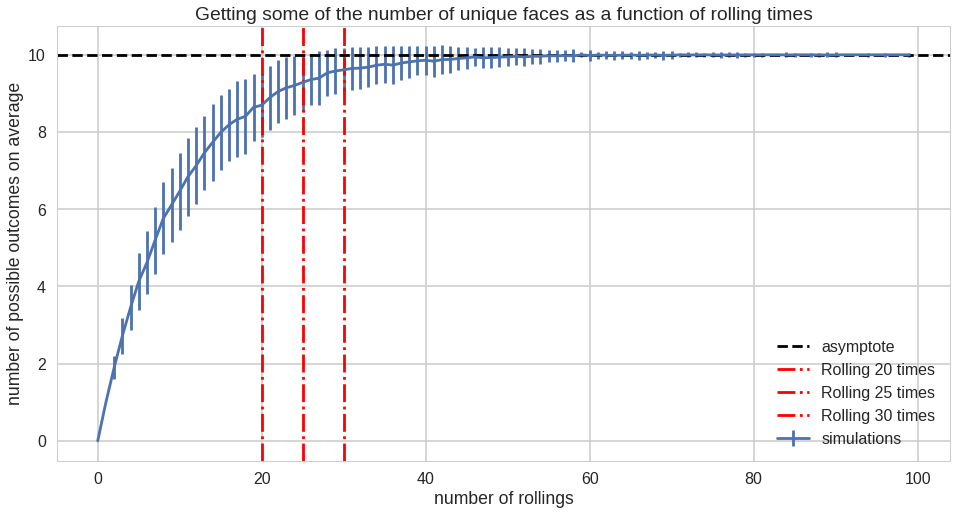

In [0]:
fig,ax = plt.subplots(figsize=(16,8))
means = result.mean(1)
stds = result.std(1)
# a different way of plotting the variance of a line: errorbar
ax.errorbar(np.arange(100),means,stds,label='simulations')
# plot a horizontal line at 10
ax.axhline(10,color='k',linestyle='--',label='asymptote')
for num in [20,25,30]:
    # plot a verticle line
    ax.axvline(num,color='r',linestyle='-.',label= f'Rolling {num} times')
ax.set(xlabel='number of rollings',
       ylabel='number of possible outcomes on average',
       title='Getting the number of unique faces as a function of rolling times')
ax.legend(loc='best')

In [0]:
# preallocation
# 1st dimension is how many times we roll the die
# 2nd dimension is how many times we execute the rolling function
# 3rd dimension is how many times we simulate the experiment (how many subjects)
result=np.zeros((100,500,50))
# the nested does not necessarily be in some order, but I admit that it should 
# be in logical order
for kk in range(50):
    for ii in range(100):
        for jj in range(500):
            temp=dice(ii)
            count_possible_outcomes = len(np.unique(temp)) == 10
            result[ii,jj,kk]=count_possible_outcomes

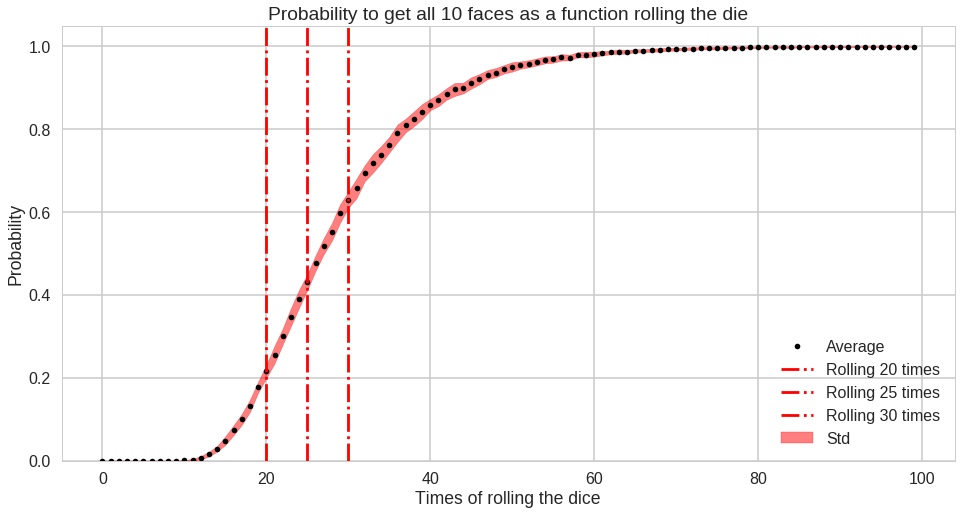

In [0]:
fig,ax = plt.subplots(figsize=(16,8))

# this is a nested averaging: after average over the second dimension, we have
# 1) times of rolling (single execution) and 2) simulation left, so we want to
# average over the second dimension again
means = result.mean(1).mean(1)
std = result.mean(1).std(1)
ax.plot(np.arange(100), # x axis represents how many rolls we execute from no rolling to roll 100 times in a single execution (a single trial)
        means,
        'k.', # a lazy way of saying black dotted line: color = 'black', linestyle = '.'
        alpha = 1.,
        label = 'Average'
       )
ax.fill_between(np.arange(100),
                means + std,
                means - std,
                color = 'red',
                alpha = 0.5,
                label = 'Std')
ax.set(xlabel = 'Times of rolling the dice',
       ylabel = 'Probability',
       title = 'Probability of getting all 10 faces as a function rolling the die',
       ylim = [0,1.05])
for num in [20,25,30]:
    ax.axvline(num,color='r',linestyle='-.',label= f'Rolling {num} times')
ax.legend(loc='lower right')